<a href="https://colab.research.google.com/github/Mohit352-bit/Machine-Learning/blob/main/Neural%20Network/Cat_and_Dog_Identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ----------------------------------------------------------------------------------------------------------------------------------------------------------------

using zip file from gdrive for fast uploading

In [ ]:
#mounting(connecting) the gdrive with colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# getting the list of all files in myDrive
!ls gdrive/MyDrive

'Class 12 Result.pdf'
'Colab Notebooks'
'Copy of Invoice-Template-sheet-printable-5.gsheet'
 Horse_Human
'How to get started with Drive.pdf'
 istockphoto-1319763895-612x612.jpg
 Male_female
 MohitINT353CA2.pdf
'mohit mark.jpg'
 Mohit-Srivastava.pdf
 Mohit_Srivastava_resume.pdf
'Pasport size '
 pexels-helena-lopes-1996332.jpg
 REsume.pdf
'Screenshot (111).png'
'Screenshot (124).png'
'Screenshot 2022-06-30 215216.jpeg.png'
 Screenshot_2022-09-01-15-42-46-955_net.one97.paytm.jpg
 Screenshot_2022-09-30-16-23-32-285_com.microsoft.teams.pdf
'Screenshot (75).png'
 tied.jfif
 unknown.png
 Untitled1.ipynb


In [ ]:
import zipfile

# Extract the archive
zip_ref = zipfile.ZipFile("gdrive/MyDrive/Cat_Dogs/cats_and_dogs_filtered.zip", 'r')
zip_ref.extractall("tmp/")
zip_ref.close()

In [ ]:
import os
train_cat_names = os.listdir("tmp/cats_and_dogs_filtered/train/cats")
print(train_cat_names[:10])
train_dog_names = os.listdir("tmp/cats_and_dogs_filtered/train/dogs")
print(train_dog_names[:10])

['cat.146.jpg', 'cat.602.jpg', 'cat.446.jpg', 'cat.955.jpg', 'cat.644.jpg', 'cat.93.jpg', 'cat.968.jpg', 'cat.477.jpg', 'cat.229.jpg', 'cat.316.jpg']
['dog.370.jpg', 'dog.387.jpg', 'dog.568.jpg', 'dog.694.jpg', 'dog.395.jpg', 'dog.436.jpg', 'dog.106.jpg', 'dog.560.jpg', 'dog.580.jpg', 'dog.438.jpg']


### Uploading image files in Jupyter Notebook

In [1]:
import os

# changing the working directory
os.chdir('C:/Users/mohit/Downloads/Compressed/cats_and_dogs_filtered/cats_and_dogs_filtered')

#variable storing the directory address
cwd = os.getcwd() 
      
# Printing the current working 
# directory (CWD) 
print("Current working directory:", cwd) 


Current working directory: C:\Users\mohit\Downloads\Compressed\cats_and_dogs_filtered\cats_and_dogs_filtered


In [2]:
#storing path of training horse pictures
train_dogs_dir_path = os.path.join('train/dogs')

#storing path of training human pictures
train_cats_dir_path = os.path.join('train/cats')

In [3]:
# list of files in dog and cat folder
train_dogs_names = os.listdir(train_dogs_dir_path)
print(train_dogs_names[:10])
train_cats_names = os.listdir(train_cats_dir_path)
print(train_cats_names[:10])

['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']


## -------------------------------------------------------------------------------------------------------------------------------


# Creating CNN Model ⚓

In [4]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3) , input_shape=(300,300,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024 , activation="relu"),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# we are using sigmoid as activation instead of softmax because it works better than softmax in binary classification (i.e. when we have 2 outputs to compare dogs and cats)
# we can also use softmax here as (2 , activation="softmax") but the sigmoid activation is more efficient here.
# softmax is used when there is more than 2 calssification

## site to learn which is best optimizer --- https://gombru.github.io/2018/05/23/cross_entropy_loss/

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 33, 33, 128)       1

In [7]:
model.compile(loss = 'binary_crossentropy' , 
              optimizer=RMSprop(learning_rate=0.001) ,
              metrics=['accuracy'] )

## we are using RMSprop intead of SGD because rmsprop , adam , adagard automatically adapt the learning rate whereas SGD dont
## we are using binary crossentropy cause there is binary output 
# ## site to learn which is best loss function  --- https://gombru.github.io/2018/05/23/cross_entropy_loss/

Now using ImageDataGenrator lib to rescale the image and convert it into binary form,

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(rescale = 1/255)

train_data = train_gen.flow_from_directory( 
    "train/", # path of main directory 
    target_size = (300 ,300) , # resizing all the images to 300x300
    batch_size = 10 , #images are taken from the directory in batches and we are taking 128 image per batch
    class_mode = "binary" # we use binary class mode as loss funtion is using binary crossentropy and output is binary

)

#for validation set 
val_gen = ImageDataGenerator(rescale = 1/255)

val_data = train_gen.flow_from_directory( 
    "validation/",  
    target_size = (300 ,300) , 
    batch_size = 10 , 
    class_mode = "binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
# now training the model

model_fiting = model.fit(train_data , steps_per_epoch=100,epochs=50 ,validation_data=val_data, verbose=2 ,batch_size =10)

Epoch 1/50
100/100 - 11s - loss: 0.8529 - accuracy: 0.5200 - val_loss: 0.6943 - val_accuracy: 0.5000
Epoch 2/50
100/100 - 7s - loss: 0.7017 - accuracy: 0.5220 - val_loss: 0.7008 - val_accuracy: 0.5000
Epoch 3/50
100/100 - 7s - loss: 0.6927 - accuracy: 0.5430 - val_loss: 0.6955 - val_accuracy: 0.5720
Epoch 4/50
100/100 - 7s - loss: 0.6938 - accuracy: 0.5410 - val_loss: 0.7411 - val_accuracy: 0.5070
Epoch 5/50
100/100 - 7s - loss: 0.6826 - accuracy: 0.5980 - val_loss: 0.6539 - val_accuracy: 0.6340
Epoch 6/50
100/100 - 7s - loss: 0.6637 - accuracy: 0.6270 - val_loss: 0.6770 - val_accuracy: 0.6550
Epoch 7/50
100/100 - 7s - loss: 0.6732 - accuracy: 0.6270 - val_loss: 0.6770 - val_accuracy: 0.5970
Epoch 8/50
100/100 - 7s - loss: 0.6693 - accuracy: 0.6460 - val_loss: 0.6818 - val_accuracy: 0.6390
Epoch 9/50
100/100 - 7s - loss: 0.5919 - accuracy: 0.7060 - val_loss: 0.6231 - val_accuracy: 0.6690
Epoch 10/50
100/100 - 7s - loss: 0.5858 - accuracy: 0.7050 - val_loss: 0.6282 - val_accuracy: 0.668

In [42]:
import numpy as np
#from google.colab import files
from tensorflow.keras.utils import load_img , img_to_array

## ----------------------------------------------------------------------------------------------------------------------------
# # FOR COLLAB WE NEED TO USE THIS CODE

# uploading_file = files.upload()

# for fn in uploading_file:
#   path = 'gdrive/MyDrive/' + fn
#   image = load_img(path , target_size=(300,300))
#   x = img_to_array(image)
#   x = x/225
#   x = np.expand_dims(x , axis=0)

#   images = np.vstack([x])
#   pred_res = model.predict(images , batch_size=10)
#   print(pred_res[0])
#   if pred_res[0]>0.5:
#     print(fn + " is a cat")
#   else:
#     print(fn + " is a dog")
## -----------------------------------------------------------------------------------------------------------------------------


#used for uploading the file we want to predict
uploading_file = os.listdir('test/')

for fn in uploading_file:
  path = "C:/Users/mohit/Downloads/Compressed/cats_and_dogs_filtered/cats_and_dogs_filtered/test/"+fn
  image = load_img(path , target_size=(300,300))
  x = img_to_array(image)
  x = x/225
  x = np.expand_dims(x , axis=0)

  images = np.vstack([x])
  pred_res = model.predict(images , batch_size=10)
  print(pred_res[0])
  if pred_res[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")

[0.5595325]
golden-retriever-dog-21668976.jpg is a dog
[0.99358094]
labrador-retriever-1210559__480.jpg is a dog


### Checking if our model is overfitting or not

In [10]:
#storing every accuracy and validation accuracy value in a list
#history - this funtion stores the value of acc , val_acc
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.5199999809265137, 0.5220000147819519, 0.5429999828338623, 0.5410000085830688, 0.5979999899864197, 0.6269999742507935, 0.6269999742507935, 0.6460000276565552, 0.7059999704360962, 0.7049999833106995, 0.7110000252723694, 0.7419999837875366, 0.7319999933242798, 0.7730000019073486, 0.7879999876022339, 0.8220000267028809, 0.8450000286102295, 0.8550000190734863, 0.8669999837875366, 0.8799999952316284, 0.8870000243186951, 0.9089999794960022, 0.925000011920929, 0.9350000023841858, 0.9570000171661377, 0.9330000281333923, 0.9679999947547913, 0.949999988079071, 0.9789999723434448, 0.9589999914169312, 0.9739999771118164, 0.9649999737739563, 0.9670000076293945, 0.9610000252723694, 0.9829999804496765, 0.9660000205039978, 0.9789999723434448, 0.9739999771118164, 0.9810000061988831, 0.9850000143051147, 0.9729999899864197, 0.9789999723434448, 0.9860000014305115, 0.9710000157356262, 0.984000027179718, 0.9769999980926514, 0.9860000014305115, 0.9890000224113464, 0.9860000014305115, 0.984000027179718]
[0.

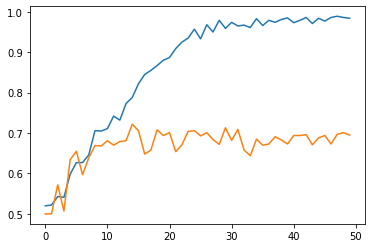

In [11]:

import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()

Since , validation set is stoping at approx 0.70 accuracy and training data is touching 1 accurancy we can eaisly see that our model is overfitting 
One reason is that our training data is less.
Second reason is that we are not using agumentation(i.e. rotating and moving image size so that our model can train on even rotated images like sleeping cat )

# Using Agumentation
with augumentation our data size increases as every images are rotated and moved for better training of model

These rotated and moved images do not get stored in our disk we it is temporarily stored in memory and used during training of model.

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,#rotates the image in 0 to 40 degree range randomly
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'# lost pixels are replaced by the nearest pixels
)

## ------------------------------------------------------------------------------------------------------------------------
# #for collab we need to use this


# train_data = train_gen.flow_from_directory( 
#     "tmp/cats_and_dogs_filtered/train", 
#     target_size = (300 ,300) , 
#     batch_size = 128 , 
#     class_mode = "binary" 

# )

# #for validation set 
# val_gen = ImageDataGenerator(rescale = 1/255)

# val_data = val_gen.flow_from_directory( 
#     "tmp/cats_and_dogs_filtered/validation",  
#     target_size = (300 ,300) , 
#     batch_size = 10 , 
#     class_mode = "binary"
# )

## -----------------------------------------------------------------------------------------------------------------------------


train_data = train_gen.flow_from_directory( 
    "train/", # path of main directory 
    target_size = (300 ,300) , # resizing all the images to 300x300
    batch_size = 10 , #images are taken from the directory in batches and we are taking 128 image per batch
    class_mode = "binary" # we use binary class mode as loss funtion is using binary crossentropy and output is binary

)

#for validation set 
val_gen = ImageDataGenerator(rescale = 1/255)

val_data = train_gen.flow_from_directory( 
    "validation/",  
    target_size = (300 ,300) , 
    batch_size = 10 , 
    class_mode = "binary"
)



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [13]:
# now training the model

model_fiting = model.fit(train_data , steps_per_epoch=100,epochs=30 ,validation_data=val_data, verbose=1)

Epoch 1/30
100/100 [==============================] - 26s 260ms/step - loss: 1.1831 - accuracy: 0.5590 - val_loss: 0.8527 - val_accuracy: 0.5400
Epoch 2/30
100/100 [==============================] - 29s 294ms/step - loss: 0.7141 - accuracy: 0.5990 - val_loss: 0.6860 - val_accuracy: 0.6280
Epoch 3/30
100/100 [==============================] - 26s 256ms/step - loss: 0.7219 - accuracy: 0.6120 - val_loss: 0.6682 - val_accuracy: 0.5630
Epoch 4/30
100/100 [==============================] - 25s 256ms/step - loss: 0.6709 - accuracy: 0.6210 - val_loss: 0.6724 - val_accuracy: 0.6290
Epoch 5/30
100/100 [==============================] - 26s 256ms/step - loss: 0.6935 - accuracy: 0.6290 - val_loss: 0.6357 - val_accuracy: 0.6490
Epoch 6/30
100/100 [==============================] - 26s 256ms/step - loss: 0.6604 - accuracy: 0.6470 - val_loss: 0.8211 - val_accuracy: 0.6170
Epoch 7/30
100/100 [==============================] - 26s 264ms/step - loss: 0.6450 - accuracy: 0.6510 - val_loss: 0.6816 - val_ac

In [48]:
import numpy as np
#from google.colab import files
from tensorflow.keras.utils import load_img , img_to_array

# #used for uploading the file we want to predict
# uploading_file = files.upload()

# for fn in uploading_file:
#   path = 'gdrive/MyDrive/' + fn
#   image = load_img(path , target_size=(300,300))
#   x = img_to_array(image)
#   x = x/225
#   x = np.expand_dims(x , axis=0)

#   images = np.vstack([x])
#   pred_res = model.predict(images , batch_size=10)
#   print(pred_res[0])
#   if pred_res[0]>0.5:
#     print(fn + " is a cat")
#   else:
#     print(fn + " is a dog")


for fn in uploading_file:
  path = "C:/Users/mohit/Downloads/Compressed/cats_and_dogs_filtered/cats_and_dogs_filtered/test/"+fn
  image = load_img(path , target_size=(300,300))
  x = img_to_array(image)
  x = x/225
  x = np.expand_dims(x , axis=0)

  images = np.vstack([x])
  pred_res = model.predict(images , batch_size=10)
  print(pred_res[0])
  if pred_res[0]>0.5:
    print(fn + " is a dog")
  else:
    print(fn + " is a cat")
    

[0.855515]
golden-retriever-dog-21668976.jpg is a dog
[0.99644744]
labrador-retriever-1210559__480.jpg is a dog


In [14]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.5590000152587891, 0.5989999771118164, 0.6119999885559082, 0.6209999918937683, 0.6290000081062317, 0.6470000147819519, 0.6510000228881836, 0.6489999890327454, 0.656000018119812, 0.6610000133514404, 0.6729999780654907, 0.652999997138977, 0.6449999809265137, 0.6650000214576721, 0.6420000195503235, 0.6600000262260437, 0.6710000038146973, 0.7039999961853027, 0.6700000166893005, 0.699999988079071, 0.675000011920929, 0.6949999928474426, 0.6830000281333923, 0.6669999957084656, 0.6880000233650208, 0.6830000281333923, 0.6610000133514404, 0.7080000042915344, 0.6980000138282776, 0.703000009059906]
[0.5400000214576721, 0.628000020980835, 0.5630000233650208, 0.6290000081062317, 0.6489999890327454, 0.6169999837875366, 0.6380000114440918, 0.6259999871253967, 0.6119999885559082, 0.652999997138977, 0.5920000076293945, 0.6340000033378601, 0.6769999861717224, 0.6240000128746033, 0.5899999737739563, 0.6840000152587891, 0.5950000286102295, 0.6880000233650208, 0.6420000195503235, 0.6790000200271606, 0.697

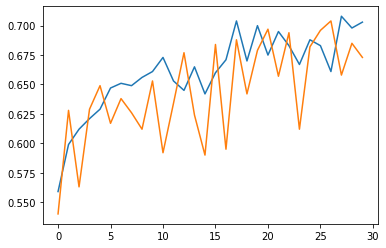

In [15]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs ,validation_acc )
plt.show()

From agumentation we can se that our model  is not much overfiting as it is gradually moving to highest accuracy along with the validation data.

We can further use tranferlearning and dropouts to remove overfitting of the model


# Dropouts
In dropout few nodes are droped from a layer which have nearly same weight as the other nodes so as to reduce the overfiting of the model.

In [9]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3) , input_shape=(300,300,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024 , activation="relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512 , activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128 , activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [10]:
model.compile(loss = 'binary_crossentropy' , 
              optimizer=RMSprop(learning_rate=0.001) ,
              metrics=['accuracy'] )

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)



train_data = train_gen.flow_from_directory( 
    "train/",  
    target_size = (300 ,300) , 
    batch_size = 10 ,
    class_mode = "binary" 

)

#for validation set 
val_gen = ImageDataGenerator(rescale = 1/255)

val_data = train_gen.flow_from_directory( 
    "validation/",  
    target_size = (300 ,300) , 
    batch_size = 10 , 
    class_mode = "binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
model_fiting = model.fit(train_data , steps_per_epoch=200,epochs=50 ,validation_data=val_data, verbose=2 ,batch_size =10)

Epoch 1/50
200/200 - 38s - loss: 0.8448 - accuracy: 0.5145 - val_loss: 0.6924 - val_accuracy: 0.5000
Epoch 2/50
200/200 - 39s - loss: 0.7144 - accuracy: 0.5330 - val_loss: 0.6835 - val_accuracy: 0.5370
Epoch 3/50
200/200 - 37s - loss: 0.6982 - accuracy: 0.5640 - val_loss: 0.6573 - val_accuracy: 0.6220
Epoch 4/50
200/200 - 39s - loss: 0.6979 - accuracy: 0.5925 - val_loss: 0.6482 - val_accuracy: 0.6180
Epoch 5/50
200/200 - 38s - loss: 0.7032 - accuracy: 0.5965 - val_loss: 0.6454 - val_accuracy: 0.5860
Epoch 6/50
200/200 - 38s - loss: 0.6756 - accuracy: 0.6180 - val_loss: 0.6447 - val_accuracy: 0.6510
Epoch 7/50
200/200 - 37s - loss: 0.6777 - accuracy: 0.6165 - val_loss: 0.8358 - val_accuracy: 0.6200
Epoch 8/50
200/200 - 38s - loss: 0.6955 - accuracy: 0.6140 - val_loss: 0.6518 - val_accuracy: 0.6300
Epoch 9/50
200/200 - 38s - loss: 0.6993 - accuracy: 0.6065 - val_loss: 0.6207 - val_accuracy: 0.6460
Epoch 10/50
200/200 - 39s - loss: 0.6887 - accuracy: 0.6280 - val_loss: 0.6531 - val_accura

In [13]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

[0.5145000219345093, 0.5329999923706055, 0.5640000104904175, 0.5924999713897705, 0.5964999794960022, 0.6179999709129333, 0.6165000200271606, 0.6140000224113464, 0.6065000295639038, 0.628000020980835, 0.6470000147819519, 0.6225000023841858, 0.6159999966621399, 0.6384999752044678, 0.6334999799728394, 0.6395000219345093, 0.6399999856948853, 0.6370000243186951, 0.6539999842643738, 0.6474999785423279, 0.6610000133514404, 0.6474999785423279, 0.656000018119812, 0.659500002861023, 0.6604999899864197, 0.656000018119812, 0.6554999947547913, 0.6535000205039978, 0.6349999904632568, 0.6520000100135803, 0.6460000276565552, 0.6644999980926514, 0.6520000100135803, 0.6614999771118164, 0.6545000076293945, 0.640999972820282, 0.6650000214576721, 0.6495000123977661, 0.6549999713897705, 0.6539999842643738, 0.6669999957084656, 0.6549999713897705, 0.6660000085830688, 0.6575000286102295, 0.6660000085830688, 0.6575000286102295, 0.6775000095367432, 0.6639999747276306, 0.6650000214576721, 0.6600000262260437]
[0.5

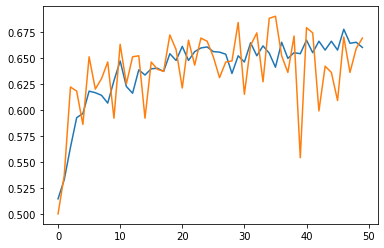

In [14]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs ,validation_acc )
plt.show()